<a href="https://colab.research.google.com/github/heysourin/GNN-Graph-Neural-Network/blob/main/Paper/Convolutional_Graph_Neural_net_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -q torch_geometric # for cora dataset

In [3]:
import numpy as np
import random
import os
import math
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch_geometric.datasets.karate import KarateClub
from torch_geometric.datasets import Planetoid #cora dataset
from torch_geometric.utils import to_dense_adj
import torch.nn.functional as F

import networkx as nx
from torch_geometric.utils import to_networkx
%matplotlib inline

Number of nodes in the graph 6
Number of edges in the graph 9

Adjacency Matrix shape (6, 6)
[[0 1 0 1 0 1]
 [1 0 1 1 1 0]
 [0 1 0 1 0 0]
 [1 1 1 0 0 1]
 [0 1 0 0 0 1]
 [1 0 0 1 1 0]]



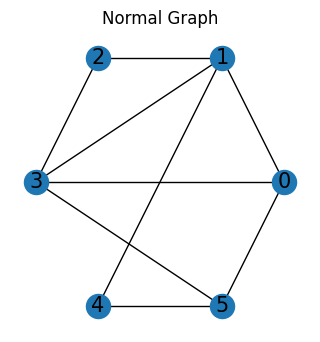

In [13]:
adj = np.array([[0,1,0,1,0,1], [1,0,1,1,1,0], [0,1,0,1,0,0], [1,1,1,0,0,1], [0,1,0,0,0,1], [1,0,0,1,1,0]])
G = nx.from_numpy_array(adj)
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes in the graph {num_nodes}")
print(f"Number of edges in the graph {num_edges}")
print()

print(f"Adjacency Matrix shape {adj.shape}")
print(adj)
print()

# draw the graph using networkx
pos = nx.circular_layout(G)
plt.figure(figsize=(3, 3))
nx.draw(G, pos, with_labels=True, node_size=300, font_size=15, font_color='black')
plt.title("Normal Graph")
plt.show()

In [11]:
adj

array([[0, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [1, 1, 1, 0, 0, 1],
       [0, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 1, 0]])

In [10]:
num_nodes

6

In [14]:
# create random features for each node having 3 dimensions
x = np.round(np.random.randn(num_nodes, 3), 2)
print(f"Feature Matrix shape {x.shape}")
print(x)

Feature Matrix shape (6, 3)
[[-1.5  -0.75  0.78]
 [-1.24  0.23  0.3 ]
 [ 0.16  0.73  1.09]
 [ 1.52 -1.18 -1.64]
 [ 0.44  0.73 -1.15]
 [ 1.32  0.84 -0.84]]
